# 🎲 Pi estimation using Monte Carlo method

In [16]:
warnings.simplefilter("ignore", category=DeprecationWarning)

import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
from IPython.core.display import display, HTML, clear_output
import warnings
import shutil
import os
import ipywidgets as widgets

Fucntion that generates n pairs of points in a window: (0,0;1,1)

In [3]:
def generate_n_points(n):
    return [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(n)]

Function that checks, which points are in, and which points are out of circle

In [4]:
def inside_outside(points):
    return (list(filter(lambda p: p[0]**2 + p[1]**2 <= 1, points)),
            list(filter(lambda p: p[0]**2 + p[1]**2 > 1, points)))


Function that estimates pi for a fixed number of points (additionaly returns all the things that the functions above)

In [5]:
def estimate_pi(n):
    points = generate_n_points(n)
    inside, outside = inside_outside(points)
    estimated_pi = 4 * (len(inside)/n)
    return (points, inside, outside, estimated_pi)

Plots (for fixed amounts of points - {100, 1000, 10000 and 100000})

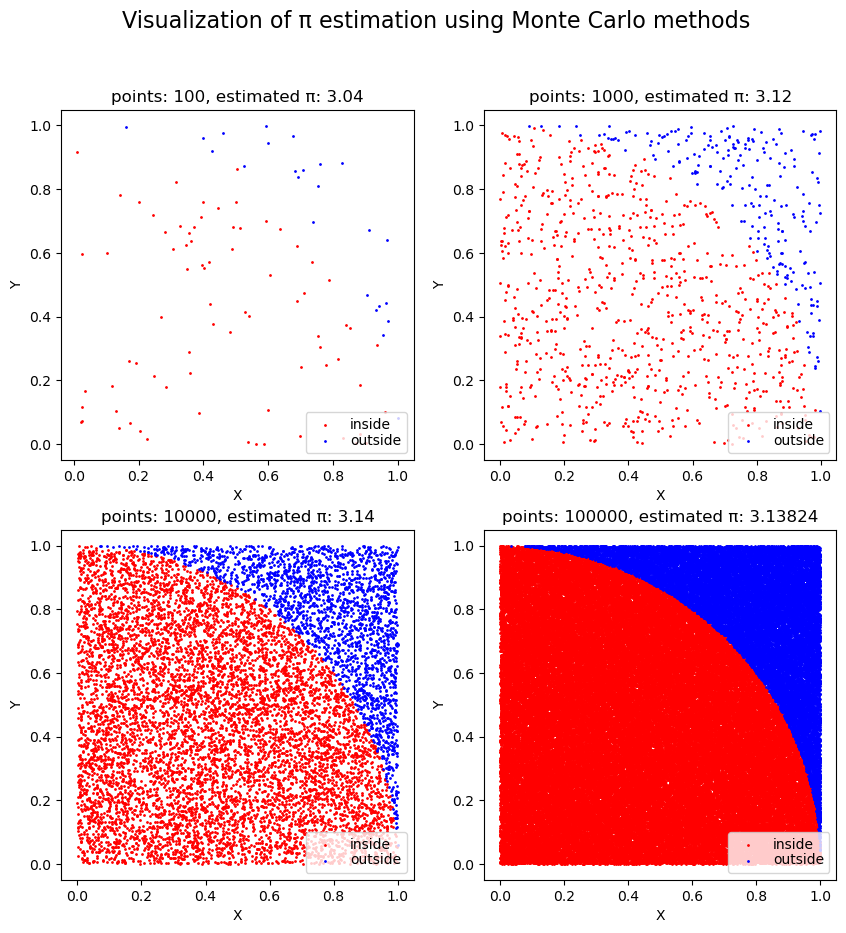

In [30]:
n_points = [100, 1000, 10000, 100000]

fig, axes = plt.subplots(2, 2, figsize = (10,10))
axes = axes.flatten()
fig.suptitle("Visualization of π estimation using Monte Carlo methods", fontsize=16)

for i, ax in enumerate(axes):
    points, inside, outside, estimated_pi = estimate_pi(n_points[i])
    xi, yi = zip(*inside)
    xo, yo = zip(*outside)
    ax.scatter(xi, yi, color = 'red', s = 1, label = 'inside')
    ax.scatter(xo, yo, color = 'blue', s = 1, label = 'outside')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f"points: {n_points[i]}, estimated π: {estimated_pi}")
    ax.legend(loc=4, labelspacing=0.1)



This code needs to be uncommented. It generates an interactive plot. Works only directly in a notebook

In [36]:
'''
slider = widgets.IntSlider(
    value=10,
    min=10,
    max=100_000,
    step=10_000,
    description='Number of points:',
    continuous_update=False,
    style = {'description_width': 'initial'} 
)

fig, axes = plt.subplots( figsize = (10,10))
fig.suptitle("Visualization of π estimation using Monte Carlo methods", fontsize=16)

def plot_visualization( value ):
    axes.clear()
    value = value['new']  
    _, inside, outside, estimated_pi = estimate_pi(value)
    xi, yi = zip(*inside)
    xo, yo = zip(*outside)
    axes.scatter(xi, yi, color = 'red', s = 1, label = 'inside')
    axes.scatter(xo, yo, color = 'blue', s = 1, label = 'outside')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_title(f"points: {value}, estimated π: {estimated_pi}")
    _= axes.legend(loc=4, labelspacing=0.1)
    clear_output(wait=True)
    display(slider)
    display(fig)

slider.observe(plot_visualization, names='value')
display(slider)
plot_visualization({'new': slider.value})'
'''

'\nslider = widgets.IntSlider(\n    value=10,\n    min=10,\n    max=100_000,\n    step=10_000,\n    description=\'Number of points:\',\n    continuous_update=False,\n    style = {\'description_width\': \'initial\'} \n)\n\nfig, axes = plt.subplots( figsize = (10,10))\nfig.suptitle("Visualization of π estimation using Monte Carlo methods", fontsize=16)\n\ndef plot_visualization( value ):\n    axes.clear()\n    value = value[\'new\']  \n    _, inside, outside, estimated_pi = estimate_pi(value)\n    xi, yi = zip(*inside)\n    xo, yo = zip(*outside)\n    axes.scatter(xi, yi, color = \'red\', s = 1, label = \'inside\')\n    axes.scatter(xo, yo, color = \'blue\', s = 1, label = \'outside\')\n    axes.set_xlabel(\'X\')\n    axes.set_ylabel(\'Y\')\n    axes.set_title(f"points: {value}, estimated π: {estimated_pi}")\n    _= axes.legend(loc=4, labelspacing=0.1)\n    clear_output(wait=True)\n    display(slider)\n    display(fig)\n\nslider.observe(plot_visualization, names=\'value\')\ndisplay(slide


100 runs of algorithm visualising how the amount of points affect the precision of an estimate

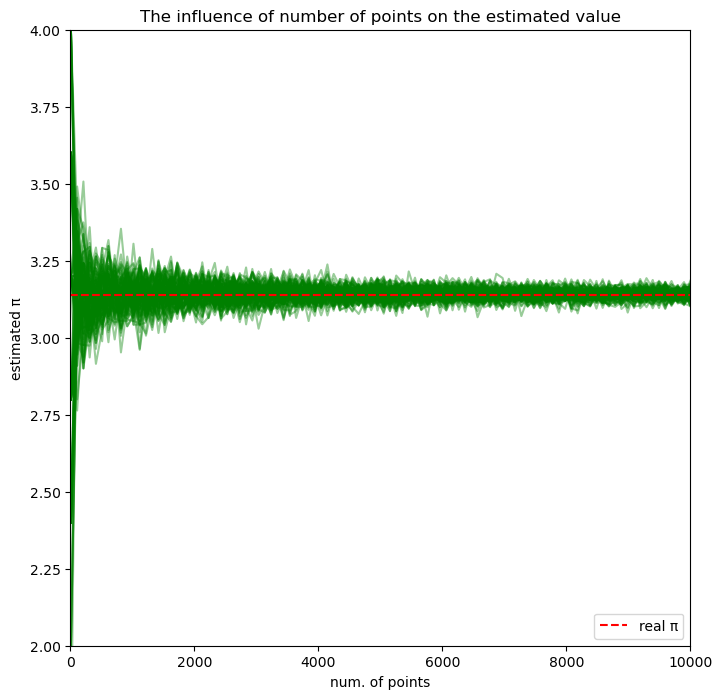

In [35]:
breaks = np.linspace(10, 10_000, 100)
tries = 100

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_ylim((2, 4))
ax.set_xlim((0, 10_000))
ax.set_title("The influence of number of points on the estimated value")
ax.set_xlabel("num. of points")
ax.set_ylabel("estimated π")

for i in range( tries ):
    values = []
    for num in breaks:
        _, _, _, pi = estimate_pi(int(num))
        values.append(pi)
    ax.plot(breaks, values, color="green", alpha=0.4)

ax.axhline(y = 3.14, color = 'r', linestyle = 'dashed', label = "real π")
_= ax.legend(loc=4)


Boxplots and histograms, visualizing the same


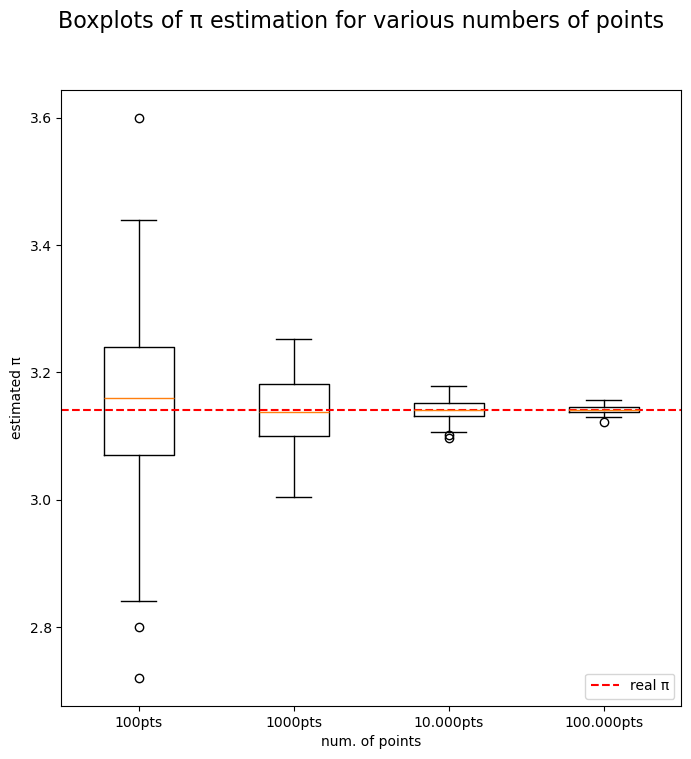

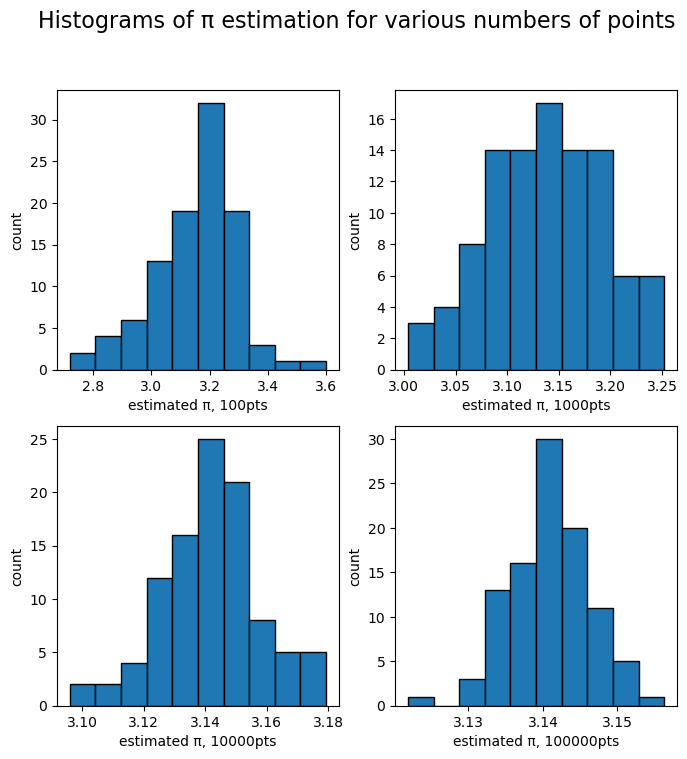

In [119]:
n_points = [100, 1000, 10000, 100000]
estimates_for_each = 100

fig, ax = plt.subplots(figsize=(8, 8)) #figura odpowiedzialna za boxploty
fig.suptitle("Boxplots of π estimation for various numbers of points", fontsize=16)

fig2, axes = plt.subplots(2, 2, figsize=(8, 8)) #figura odpowiedzialna za histogramy
fig2.suptitle("Histograms of π estimation for various numbers of points", fontsize=16)
axes = axes.flatten()

data = []

for i, points in enumerate(n_points):
    l = []
    for _ in range(estimates_for_each):
        _, _, _, pi = estimate_pi(int(points))
        l.append(pi)
    axes[i].hist(l, edgecolor="black")
    axes[i].set_xlabel(f"estimated π, {points}pts")
    axes[i].set_ylabel("count")
    data.append(l)

_= ax.boxplot(data, tick_labels = ["100pts", "1000pts", "10.000pts", "100.000pts"])
ax.axhline(y = 3.14, color = 'r', linestyle = 'dashed', label = "real π")
ax.set_ylabel("estimated π")
ax.set_xlabel("num. of points")
_= ax.legend(loc=4)


Visualization of MSE. Using logarithmic scale to see the drop more clearly

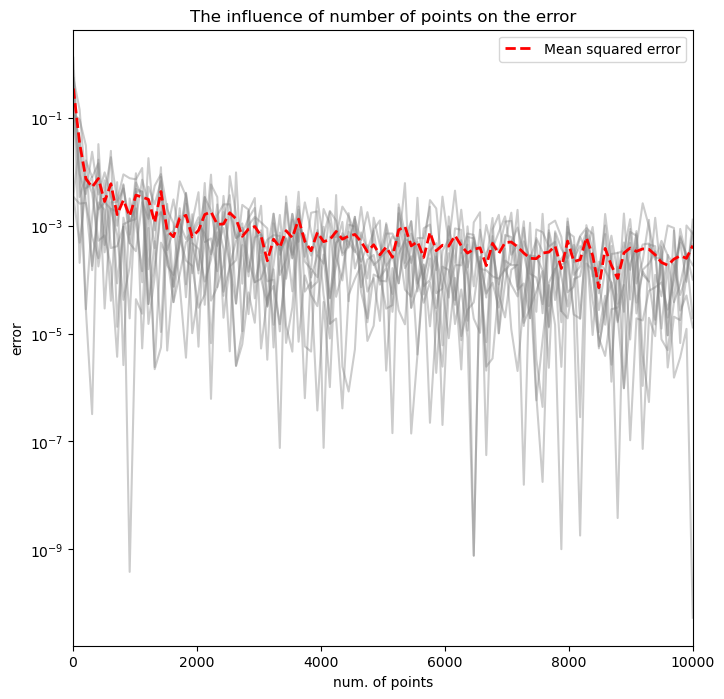

In [34]:
breaks = np.linspace(10, 10_000, 100)
tries = 10

fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim((0, 10_000))
ax.set_title("The influence of number of points on the error")
ax.set_xlabel("num. of points")
ax.set_ylabel("error")

all_values = []

for i in range( tries ):
    values = []
    for num in breaks:
        _, _, _, pi = estimate_pi(int(num))
        values.append((pi - np.pi)**2)
    ax.plot(breaks, values, color="gray", alpha=0.4)
    all_values.append(values)

mean_squared_error = np.mean(all_values, axis=0)
ax.plot(breaks, mean_squared_error, color="red", linestyle="dashed", linewidth=2, label="Mean squared error")
ax.set_yscale("log")
_=ax.legend(loc=1)

Cells belowe provide code for gif generation

In [37]:
plt.ioff()
fig, axes = plt.subplots( figsize=(8, 8))
numbers = np.linspace(10, 20000, 25, dtype=int)
fig.suptitle("π aproximation using Monte Carlo gif", fontsize=20)
inside_scatter = axes.scatter([], [], color='red', s=1, label='inside')
outside_scatter = axes.scatter([], [], color='blue', s=1, label='outside')
axes.legend(loc=4, labelspacing=0.1)
images = []

try:
    os.mkdir("images")
except FileExistsError:
    print(f"Directory already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create directory.")
except Exception as e:
    print(f"An error occurred: {e}")

for i, num in enumerate(numbers):
    points, inside, outside, estimated_pi = estimate_pi(num)
    xi, yi = zip(*inside)
    xo, yo = zip(*outside)
    axes.scatter(xi, yi, color = 'red', s = 1, label = 'inside')
    axes.scatter(xo, yo, color = 'blue', s = 1, label = 'outside')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')    
    axes.set_title(f"points: {num}, estimated π: {round(estimated_pi, 4)}")
    axes.legend([inside_scatter, outside_scatter], ["inside", "outside"], loc=4, labelspacing=0.1)
    filename = f"images/frame{i+1}.png"
    images.append(filename)
    fig.savefig(filename, bbox_inches="tight")


In [38]:
with imageio.get_writer("pi_estimation.gif", fps = 5, loop = 0) as writer:
    for image in images:
        img = imageio.imread(image)
        writer.append_data(img)

In [39]:
shutil.rmtree("images")

In [40]:
full_path = os.path.abspath("pi_estimation.gif")
display(HTML(f'<img src="file://{full_path}" width="500">'))

## 📌 Summary

### 🎯 Project objectives
The objective of this project was estimating pi value using Monte Carlo method
  
  
  

### 🎲 How does this algorithm work?

Monte Carlo methods use random sampling to estimate pi value by simulating points in the coordinate system

**Algorithm steps:**
1. **Points generation**  
   - We randomly generate `N` points with cooridnates inside a square window (0,0 ; 1,1)
   
2. **Validating the positions of points**  
   - Points lie within the circle of radius 1, if they satisfay the condition: x^2 + y^2 <= 1

3. **Calculating π**  
   - Square's area is 1
   - Are of the sector of the circle is ( π * r^2 ) / 4
   - The ratio of the area of ​​a circle sector to the area of ​​a square is equal to the ratio of the number of "hit" points to the total number of points
   - We calculate π using proportions

### 🔬 Conclusions
- Monte Carlo method allows us to estimate pi value in a probabilistic way
- Accuracy increases along with the number of points used to estimate
- If we use too few points, our estimate is biased
